In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

[I 2025-04-27 04:16:35,660] A new study created in memory with name: no-name-18175ca2-b6c7-4c43-8810-8f38c837e187
[I 2025-04-27 04:16:39,622] Trial 0 finished with value: 0.95158953722334 and parameters: {'n_estimators': 2987, 'learning_rate': 0.0035538775225992707, 'num_leaves': 91, 'max_depth': 5, 'min_child_samples': 76, 'subsample': 0.7530116630312037, 'colsample_bytree': 0.8864876699709267, 'reg_alpha': 1.6145776338337897e-08, 'reg_lambda': 0.015110642657861951}. Best is trial 0 with value: 0.95158953722334.
[I 2025-04-27 04:16:43,838] Trial 1 finished with value: 0.9544064386317906 and parameters: {'n_estimators': 5479, 'learning_rate': 0.1150313082634329, 'num_leaves': 76, 'max_depth': 8, 'min_child_samples': 82, 'subsample': 0.9333461564313971, 'colsample_bytree': 0.46477053484775704, 'reg_alpha': 1.0347360373039622e-08, 'reg_lambda': 0.004839382585890335}. Best is trial 1 with value: 0.9544064386317906.
[I 2025-04-27 04:16:46,333] Trial 2 finished with value: 0.965754527162977

Best trial:
Accuracy: 0.9743259557344064
Best hyperparameters:  {'n_estimators': 2935, 'learning_rate': 0.062232395173900494, 'num_leaves': 49, 'max_depth': 6, 'min_child_samples': 47, 'subsample': 0.9539799054468667, 'colsample_bytree': 0.4638660784638903, 'reg_alpha': 0.13242461673430136, 'reg_lambda': 0.0004848082159489528}


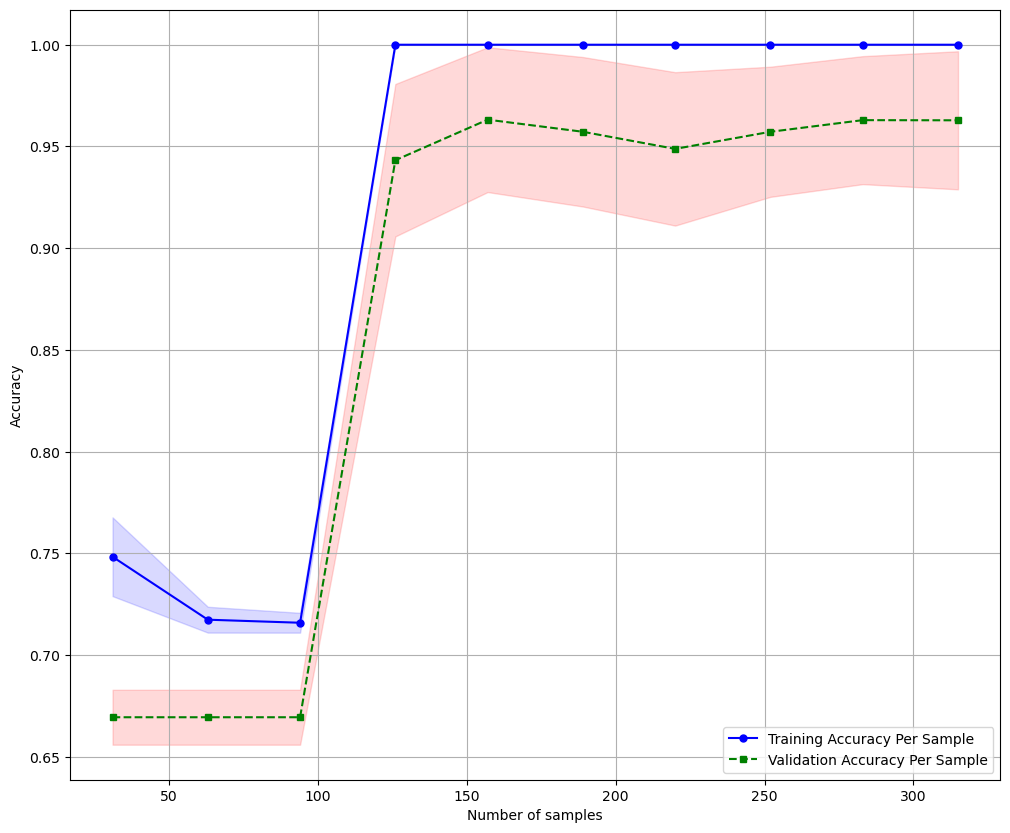

Confusion Matrix
[[ 60   4]
 [  1 106]]
Accuracy: 0.9708, Precision: 0.9636, Recall: 0.9907, F1: 0.9770, AUC:0.9936


In [2]:
outlier_params = {'n_estimators': 1000, 'n_jobs': -1}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)

df_train = X_train.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'if', outlier_params)

helper.train_and_evaluate_model('lgbm', df_train_outlier_removed.iloc[:,:-1], X_test, df_train_outlier_removed.iloc[:,-1], y_test)